In [11]:
import sys
sys.path.append("..")

import data_frame
import models
import importlib
import evaluator as ev

In [13]:
filePath = "../../KiDS-DR5-WCScut_x_DESI-DR1-small.fits"
df = data_frame.DataFrame(filePath, "QSO", data_frame.MaxFiller())

In [24]:
df.data.loc[df.data["faint"], "MAG_GAAP_r"].min()

np.float32(22.860006)

In [25]:
importlib.reload(models)
model = models.MLModelContext(strategy=models.ANNSingleGauss(df))
model.train()
model.test_predict()

Epoch 66: early stopping
Restoring model weights from the end of the best epoch: 36.


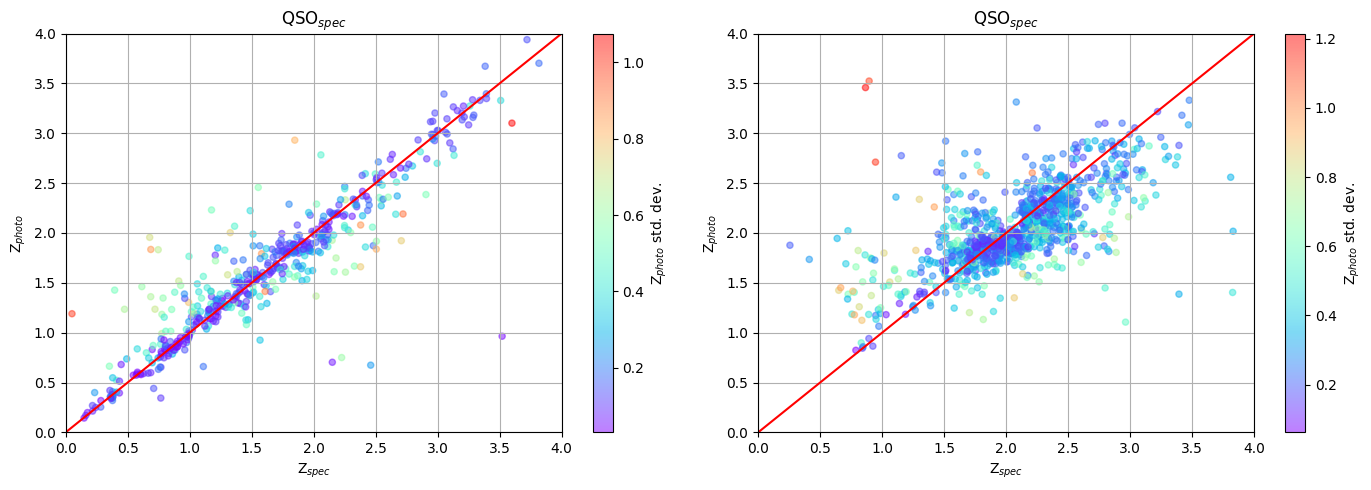

,MSE,R^2,Redshift error
test,0.092702,0.834591,"(0.01250758815725936, 0.1340709001949418)"
faint,0.22412,0.343458,"(-0.0007633788199014947, 0.17358222313358077)"


In [26]:
importlib.reload(ev)
evaluator = ev.Evaluator(df)
evaluator.redshift_std()
evaluator.evaluate_metrics()